# 1D-signal data augmentation for regression problem
https://github.com/fdesmond/seme-ts

In [1]:
# standard module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# tsmall module
from tsmall import *

## The energy dataset
As a first example, we consider the [Appliances energy prediction Data Set](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction). The dataset is ready-to-use, however, we filter the most important features following the related publication [Data driven prediction models of energy use of appliances in a low-energy house](https://www.sciencedirect.com/science/article/pii/S0378778816308970?via%3Dihub).

The `data_A` is a filtered version of the original dataset. Observe that
- the target variable `Y` is given by the `Appliances` feature
- the `date` column is used as a index: we are not going to exploit the time-series properties of the features, but only ther 1d-signal nature (see below in Data Augmentation to build `data_C`)

In [2]:
energy = pd.read_csv('energy_data.csv', parse_dates=['date'])
energy.set_index('date', inplace=True)

# most important columns, Appliances put in the end
ts_index = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Tdewpoint', 'Appliances']

data_A = energy[ts_index]
display(data_A.head(), data_A.describe())

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Appliances
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,5.3,60
2016-01-11 17:10:00,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,5.2,60
2016-01-11 17:20:00,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,5.1,50
2016-01-11 17:30:00,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,5.0,50
2016-01-11 17:40:00,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,4.9,60


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Appliances
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,...,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,3.760707,97.694958
std,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,...,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,4.194648,102.524891
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,-6.600000,10.000000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,...,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,0.900000,50.000000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,...,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,3.433333,60.000000
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,...,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,6.566667,100.000000
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,15.500000,1080.000000


#### quick EDA 
A few plots to grasp the dataset structure.

Text(0.5, 1.0, 'Appliances histogram')

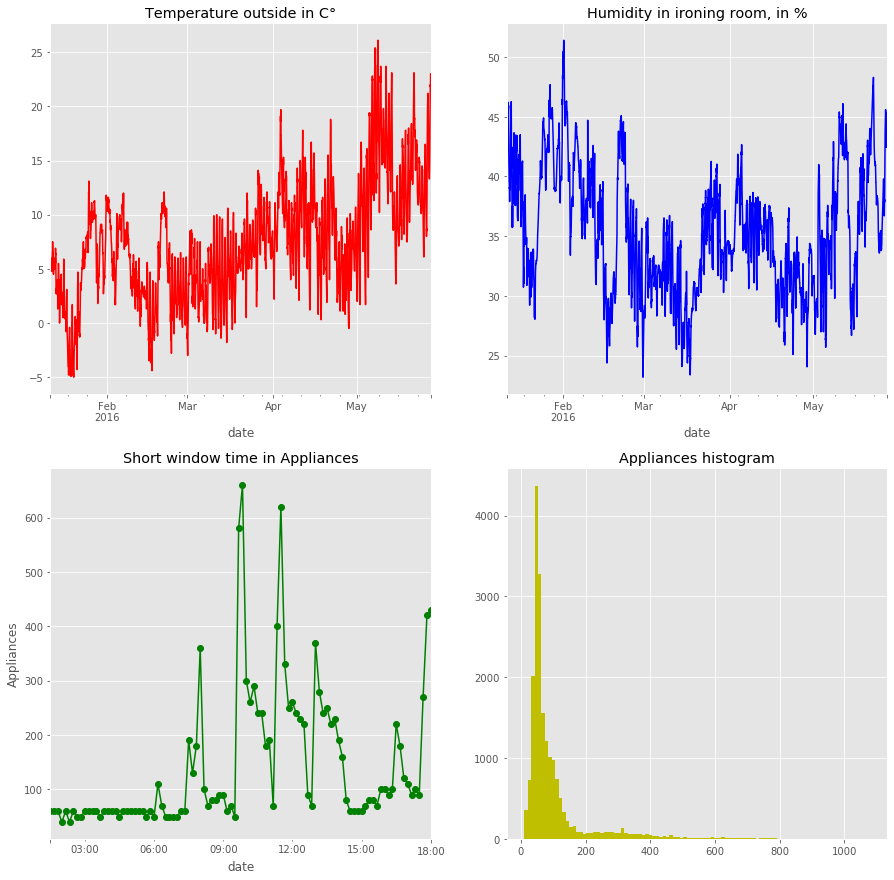

In [3]:
fig, ax = plt.subplots(figsize=[15,15], nrows=2, ncols=2)
data_A.T_out.plot(ax=ax[0,0], title='Temperature outside in C°', color='r')
data_A.RH_7.plot(ax=ax[0,1], title='Humidity in ironing room, in %', color='b')
data_A.Appliances.iloc[-100:].plot(marker='o', color='g', title='Short window time in Appliances', ax=ax[1,0]).set(ylabel='Appliances')
data_A.Appliances.hist(bins=100, ax=ax[1,1], color='y').set_title('Appliances histogram')

### obtaining `data_B` and `data_C` 
#### subsampling procedure
We perform a block sampling by randomly selecting a few blocks(i.e., consecutive rows) of fixed length from `data_A`. This operation is performed by `block_sampling()` function in `tsmall.preprocessing`. We then *check* that the sampling procedure has more or less kept the statistical properties of the target feature.

(300, 24)

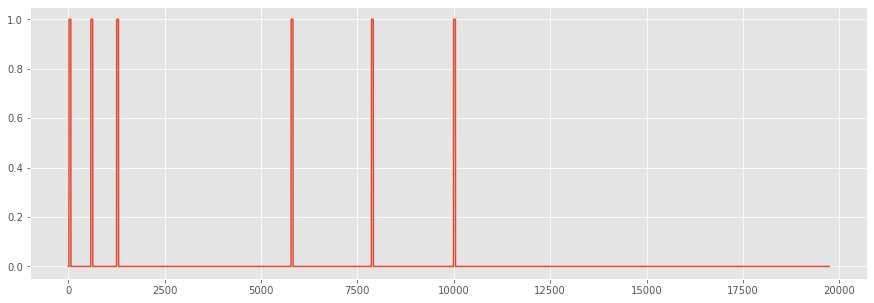

In [4]:
# we subsample 5 blocks of length 60 from data_A
indices_B = block_sampling(data_A.shape[0], 6, 50)
data_B = data_A[indices_B]
display(data_B.shape)

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(indices_B)

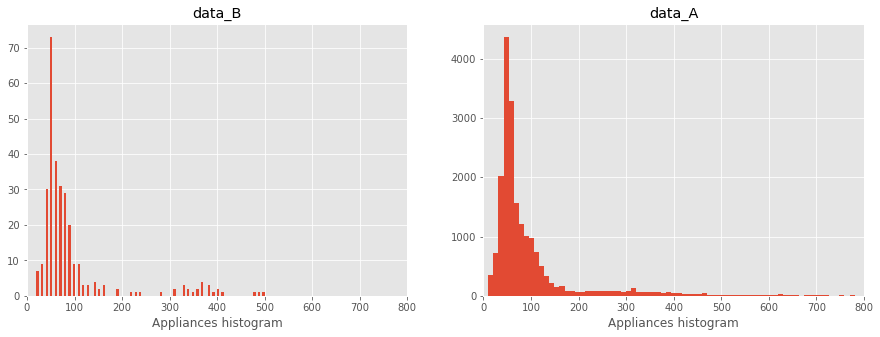

In [5]:
# visually check that the data_B has a similar Appliances histogram
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=2)
ax[0].set(title='data_B', xlabel='Appliances histogram', xlim=[0,800])
ax[1].set(title='data_A', xlabel='Appliances histogram', xlim=[0,800])

data_B.Appliances.hist(bins=100, ax=ax[0])
data_A.Appliances.hist(bins=100, ax=ax[1])

#### data augmentation
Data augmentation is performed by `dfaug()` and `tsaug()` functions in `tsmall.augment`. The output, `data_C`, is a dataframe consisting in the original dataframe, i.e., `data_B`, plus a distorted version of it. The distortion is made by the function `tsaug()` applied to a randomly selected time window of a feature (iterating on time-windows and features): it consists in applying white noise to the phase at the level of the [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) and inverting the signal back using the inverse FFT (IFFT).

In [6]:
data_C = dfaug(data_A, sigma=0.3)     # sigma tunes the distortion

/Users/fdesmond/Dropbox/Coding/SEME ts/tsmall/augment.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  X_dist[i:i+t_int, j] = tsaug(X_dist[i:i+t_int, j], sigma=sigma)


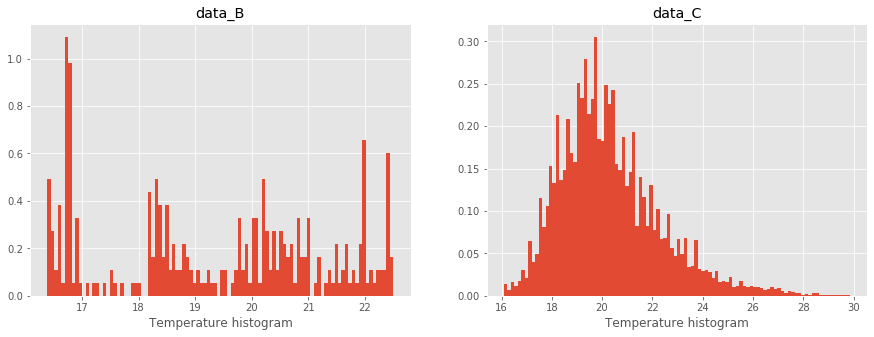

In [7]:
# visually check that the data_B has a similar Appliances histogram
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=2)
ax[0].set(title='data_B', xlabel='Temperature histogram')
ax[1].set(title='data_C', xlabel='Temperature histogram')

data_B.T2.hist(bins=100, ax=ax[0], density=True)
data_C.T2.hist(bins=100, ax=ax[1], density=True)

### train-test split 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y_A = data_A.Appliances
X_A = data_A.drop(columns='Appliances')

xtrain_A, xtest_A, ytrain_A, ytest_A = train_test_split(X_A, y_A, random_state=42)

In [10]:
y_B = data_B.Appliances
X_B = data_B.drop(columns='Appliances')

xtrain_B, xtest_B, ytrain_B, ytest_B = train_test_split(X_B, y_B, random_state=42)

In [11]:
y_C = data_C.Appliances
X_C = data_C.drop(columns='Appliances')

xtrain_C, xtest_C, ytrain_C, ytest_C = train_test_split(X_C, y_C, random_state=42)

### model fitting

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf_A = RandomForestRegressor()
rf_B = RandomForestRegressor()
rf_C = RandomForestRegressor()

In [14]:
rf_A.fit(xtrain_A, ytrain_A)
rf_B.fit(xtrain_B, ytrain_B)
rf_C.fit(xtrain_C, ytrain_C)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
display(rf_A.score(xtrain_A, ytrain_A), rf_A.score(xtest_A, ytest_A))

0.9407520829257274

0.5865860532875813

In [16]:
display(rf_B.score(xtrain_B, ytrain_B), rf_B.score(xtest_B, ytest_B), rf_B.score(xtest_A, ytest_A))

0.9105800968010882

0.6977437321073381

-0.7474589855578637

In [17]:
display(rf_C.score(xtrain_C, ytrain_C), rf_C.score(xtest_C, ytest_C), rf_C.score(xtest_B, ytest_B), rf_C.score(xtest_A, ytest_A))

0.9710321213446891

0.7958623632662444

0.8357007049130616

0.9044744796774662

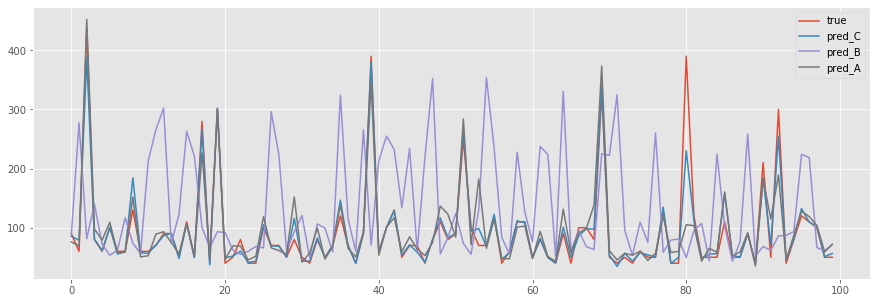

In [31]:
plt.rcParams['figure.figsize'] = [15, 5]
s=100
plt.plot(range(s), ytest_A[s:200], label = "true")
plt.plot(range(s), rf_C.predict(xtest_A[s:200]), label = "pred_C")
plt.plot(range(s), rf_B.predict(xtest_A[s:200]), label = "pred_B")
plt.plot(range(s), rf_A.predict(xtest_A[s:200]), label = "pred_A")
plt.legend()